In [24]:
class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=10,
                 shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle  
        if random_state:  
            np.random.seed(random_state)

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [25]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail(n=10)

,0,1,2,3,4
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


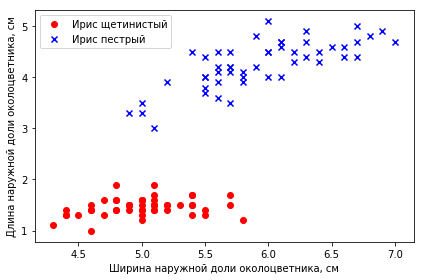

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# выборка по виду
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

# вывести данные
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Ирис щетинистый')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='Ирис пестрый')

plt.xlabel('Ширина наружной доли околоцветника, см')
plt.ylabel('Длина наружной доли околоцветника, см')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

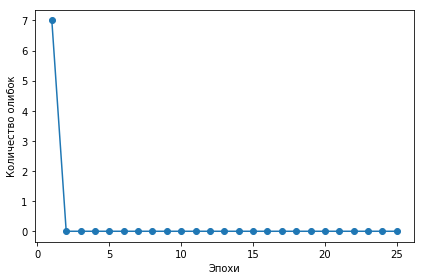

In [27]:
ppn = Perceptron(eta=0.15, n_iter=25)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Количество олибок')

plt.tight_layout()
plt.show()

In [28]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # настройка маркеров и палитры
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # вывести решение
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # вывести образцы классов
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

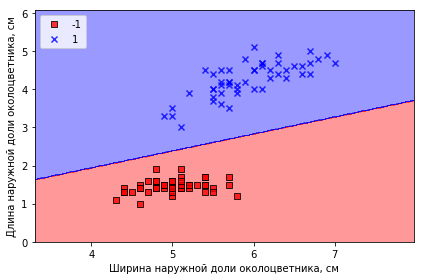

In [29]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Ширина наружной доли околоцветника, см')
plt.ylabel('Длина наружной доли околоцветника, см')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()